In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Download Dataset

In [10]:
data = pd.read_csv('https://richardson.byu.edu/220/OnlineNewsPopularity.csv', delimiter=',\s+', engine='python')
data

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


# Exploratory Data Analysis

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64


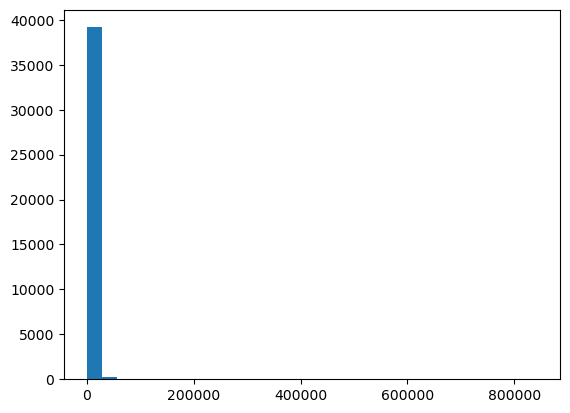

In [11]:
# 1. Plot the target variable. Determine if the target variable seems appropriate or if any transformations are needed.
shares = data.iloc[:, -1]

print(shares.describe())

plt.hist(shares, bins=30)

plt.show()

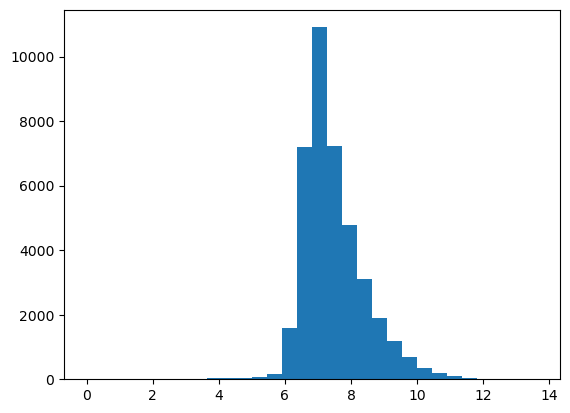

In [12]:
# Apply a log transform because the variables shares are heavily skewed
shares = np.log(shares)

plt.hist(shares, bins=30)

plt.show()

In [33]:
# 2. Build a linear regression model without higher-order terms and identify the most significant predictors.
def remove_worst_feature(model, X):
    worst_feature = model.pvalues.drop("const").idxmax()
    print(f"Removing {worst_feature} with p-value {model.pvalues.max()}")
    X = X.drop(worst_feature, axis=1)
    return X

def remove_insignificant_features(model, X, y):
    while model.pvalues.max() > 0.05:
        X = remove_worst_feature(model, X)
        model = sm.OLS(y, X).fit()
    return model, X

X = data.drop(["shares", "url"], axis=1).astype(float)
X = sm.add_constant(X)
y = np.log(data["shares"]).astype(float)

linear_model = sm.OLS(y, X).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     101.0
Date:                Thu, 05 Dec 2024   Prob (F-statistic):               0.00
Time:                        21:58:11   Log-Likelihood:                -50705.
No. Observations:               39644   AIC:                         1.015e+05
Df Residuals:                   39586   BIC:                         1.020e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -23.8866    394.230     -0.061      0.952    -796.587     748.814
timedelta                      6.156e-05   2.97e-05      2.073      0.038    3.36e-06       0.000
n_tokens_title                    0.0081      0.002      3.689      0.000       0.004       0.012
n_tokens_content                4.06e-05   1.69e-05      2.401      0.016    7.45e-06    7.37e-05
n_unique_tokens                   0.1626      0.146      1.117      0.264      -0.123       0.448
n_non_stop_words                  0.0769      0.447      0.172      0.863      -0.800       0.953
n_non_stop_unique_tokens         -0.2426      0.123     -1.966      0.049      -0.484      -0.001
num_hrefs                         0.0042      0.001      8.290      0.000       0.003       0.005
num_self_hrefs                   -0.0080      0.001     -5.916      0.000      -0.011      -0.005
num_imgs                          0.0024      0.001      3.583      0.000       0.001       0.004
num_videos                        0.0019      0.001      1.601      0.109      -0.000       0.004
average_token_length             -0.0919      0.018     -4.997      0.000      -0.128      -0.056
num_keywords                      0.0119      0.003      4.250      0.000       0.006       0.017
data_channel_is_lifestyle        -0.1025      0.030     -3.427      0.001      -0.161      -0.044
data_channel_is_entertainment    -0.1797      0.019     -9.265      0.000      -0.218      -0.142
data_channel_is_bus              -0.1657      0.029     -5.721      0.000      -0.222      -0.109
data_channel_is_socmed            0.1607      0.028      5.698      0.000       0.105       0.216
data_channel_is_tech              0.1028      0.028      3.653      0.000       0.048       0.158
data_channel_is_world            -0.0385      0.029     -1.345      0.179      -0.095       0.018
kw_min_min                        0.0009      0.000      7.227      0.000       0.001       0.001
kw_max_min                     1.706e-05   3.81e-06      4.477      0.000    9.59e-06    2.45e-05
kw_avg_min                       -0.0001   2.34e-05     -5.438      0.000      -0.000   -8.15e-05
kw_min_max                    -3.535e-07   8.91e-08     -3.968      0.000   -5.28e-07   -1.79e-07
kw_max_max                     5.049e-08   4.46e-08      1.131      0.258    -3.7e-08    1.38e-07
kw_avg_max                    -2.872e-07   6.42e-08     -4.475      0.000   -4.13e-07   -1.61e-07
kw_min_avg                    -5.044e-05   5.72e-06     -8.812      0.000   -6.17e-05   -3.92e-05
kw_max_avg                    -4.188e-05   1.91e-06    -21.872      0.000   -4.56e-05   -3.81e-05
kw_avg_avg                        0.0003   1.09e-05     30.768      0.000       0.000       0.000
self_reference_min_shares      7.394e-07   5.

In [34]:
tuned_model, tuned_X = remove_insignificant_features(linear_model, X, y)
tuned_model.summary()

Removing self_reference_max_shares with p-value 0.9985225129173783
Removing avg_positive_polarity with p-value 0.9711130490554427
Removing weekday_is_saturday with p-value 0.9546266486279503
Removing is_weekend with p-value 0.954583839408575
Removing LDA_02 with p-value 0.9523481420933932
Removing min_negative_polarity with p-value 0.88939371480128
Removing weekday_is_sunday with p-value 0.8860736278559794
Removing global_rate_negative_words with p-value 0.6270525305499155
Removing max_positive_polarity with p-value 0.3997371499616633
Removing n_non_stop_words with p-value 0.44618402168361715
Removing abs_title_sentiment_polarity with p-value 0.37811851191539325
Removing kw_max_max with p-value 0.2592122979978594
Removing data_channel_is_world with p-value 0.22100542541512572
Removing max_negative_polarity with p-value 0.21880833497859853
Removing num_videos with p-value 0.10673030213012387
Removing global_sentiment_polarity with p-value 0.07046144419701945
Removing self_reference_min_

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     136.7
Date:                Thu, 05 Dec 2024   Prob (F-statistic):               0.00
Time:                        21:58:13   Log-Likelihood:                -50713.
No. Observations:               39644   AIC:                         1.015e+05
Df Residuals:                   39601   BIC:                         1.019e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             6.5863      0.054    122.400      0.000       6.481       6.692
timedelta                      5.821e-05   2.87e-05      2.031      0.042    2.04e-06       0.000
n_tokens_title                    0.0081      0.002      3.657      0.000       0.004       0.012
n_tokens_content               5.194e-05   1.26e-05      4.132      0.000    2.73e-05    7.66e-05
n_unique_tokens                   0.2624      0.109      2.399      0.016       0.048       0.477
n_non_stop_unique_tokens         -0.2799      0.118     -2.374      0.018      -0.511      -0.049
num_hrefs                         0.0042      0.001      8.441      0.000       0.003       0.005
num_self_hrefs                   -0.0080      0.001     -6.104      0.000      -0.011      -0.005
num_imgs                          0.0023      0.001      3.474      0.001       0.001       0.004
average_token_length             -0.0955      0.018     -5.341      0.000      -0.131      -0.060
num_keywords                      0.0124      0.003      4.458      0.000       0.007       0.018
data_channel_is_lifestyle        -0.0830      0.025     -3.270      0.001      -0.133      -0.033
data_channel_is_entertainment    -0.1647      0.017     -9.646      0.000      -0.198      -0.131
data_channel_is_bus              -0.1463      0.024     -6.080      0.000      -0.193      -0.099
data_channel_is_socmed            0.1828      0.023      7.887      0.000       0.137       0.228
data_channel_is_tech              0.1262      0.022      5.863      0.000       0.084       0.168
kw_min_min                        0.0008   8.64e-05      9.334      0.000       0.001       0.001
kw_max_min                     1.742e-05   3.81e-06      4.578      0.000    9.96e-06    2.49e-05
kw_avg_min                       -0.0001   2.34e-05     -5.498      0.000      -0.000   -8.28e-05
kw_min_max                    -3.716e-07   8.83e-08     -4.210      0.000   -5.45e-07   -1.99e-07
kw_avg_max                    -2.527e-07   6.05e-08     -4.177      0.000   -3.71e-07   -1.34e-07
kw_min_avg                    -5.138e-05    5.7e-06     -9.017      0.000   -6.25e-05   -4.02e-05
kw_max_avg                    -4.254e-05   1.89e-06    -22.512      0.000   -4.62e-05   -3.88e-05
kw_avg_avg                        0.0003   1.07e-05     31.601      0.000       0.000       0.000
self_reference_avg_sharess     1.946e-06   1.85e-07     10.525      0.000    1.58e-06    2.31e-06
weekday_is_monday                -0.2205      0.016    -13.573      0.000      -0.252      -0.189
weekday_is_tuesday               -0.2875      0.016    -18.108      0.000      -0.319      -0.256
weekday_is_wednesday             -0.2843      0.016    -17.902      0.000      -0.315      -0.253
weekday_is_thursday              -0.2789     

In [44]:
sorted_features = sorted(zip(tuned_model.pvalues.index, tuned_model.pvalues), key=lambda x: x[1])
sorted_features = pd.DataFrame(sorted_features, columns=["Feature", "P-value"])
print(f"The five most significant features are:\n{sorted_features.drop(0).head()}")
sorted_features

The five most significant features are:
                Feature        P-value
1            kw_avg_avg  1.788142e-216
2            kw_max_avg  1.595246e-111
3    weekday_is_tuesday   5.428202e-73
4  weekday_is_wednesday   2.182979e-71
5   weekday_is_thursday   2.468833e-68


,Feature,P-value
0,const,0.000000e+00
1,kw_avg_avg,1.788142e-216
2,kw_max_avg,1.595246e-111
3,weekday_is_tuesday,5.428202e-73
4,weekday_is_wednesday,2.182979e-71
5,weekday_is_thursday,2.468833e-68
6,weekday_is_monday,7.216608e-42
7,LDA_00,5.191217e-40
8,weekday_is_friday,1.598841e-37
9,self_reference_avg_sharess,7.185713e-26


In [ ]:
# 3. Build a regression tree to identify important predictors.


In [ ]:
# 4. Select several significant features from steps 2 and 3. Create visualizations or
# tables to explore the relationships between these features and the target variable.

5. Write an EDA section in your technical report. Report the results of the ini-
tial models and include figures or tables that show the target variable and its
relationship with potentially significant predictors.

In [ ]:
# 6. Use appropriate methods to remove insignificant variables from the model.

# Linear Regression Modeling 

In [ ]:
# 1. Split the data into training and testing sets. Use the training set for model fitting
# and the testing set to check for overfitting and predictive performance.

In [ ]:
# 2. Explore transformations of the target and other variables.

In [ ]:
# 3. Explore higher-order terms.

In [ ]:
"""4. Reduce the model using the following methods:
• Stepwise model evaluation methods to remove insignificant variables.
• LASSO regression to fit the full model and remove insignificant variables.
Tune the model to find the best a."""

5. Write a section in your technical report that reports the out-of-sample perfor-
mance of the models. Discuss the most significant predictors and evaluate the
model?s usefulness for predicting future shares.

# Regression Tree Modeling

In [ ]:
# 1. Use the same training and testing sets as above.

In [ ]:
# 2. Use cost-complexity pruning and cross-validation to find a model that fits well
# on out-of-sample data.

In [ ]:
# 3. Fit a random forest regression model, using cost-complexity pruning for the in-
# dividual trees.

In [ ]:
# 4. Write a section in your technical report that reports the out-of-sample perfor-
# mance of the models. Discuss the model's usefulness for predicting future shares.

# Conclusion

Compare each model’s predictive accuracy on the test set. Choose the
best-performing model as the final predictive model. Write a concluding section in
your technical report that addresses Mashable?s business concerns and presents your
final model along with your confidence in its predictions.